In [4]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

from scipy.linalg import solve

In [3]:
L = 1
nt = 100
nx = 51
alpha = 1.22e-3

dx = L/(nx-1)

Ti = np.zeros(nx)
Ti[0] = 100

In [5]:
def generateMatrix(N, sigma):
    """ Computes the matrix for the diffusion equation with backward Euler
        Dirichlet condition at i=0, Neumann at i=-1
    
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float 
        alpha*dt/dx^2
    
    Returns:
    -------
    A: 2D numpy array of float
        Matrix for diffusion equation
    """
   
    # Setup the diagonal
    d = np.diag(np.ones(N-2)*(2+1./sigma))
    
    # Consider Neumann BC
    d[-1,-1] = 1+1./sigma
    
    # Setup upper diagonal
    ud = np.diag(np.ones(N-3)*-1, 1)
    
    # Setup lower diagonal
    ld = np.diag(np.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A

In [6]:
def generateRHS(T, sigma):
    """ Computes right-hand side of linear system for diffusion equation
        with backward Euler
    
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float
        alpha*dt/dx^2
    
    Returns:
    -------
    b: array of float
        Right-hand side of diffusion equation with backward Euler
    """
    b = np.zeros_like(T)
    
    b = T[1:-1]*1./sigma
    # Consider Dirichlet BC
    b[0] += T[0]
    
    return b

In [7]:
def implicit_ftcs(T, A, nt, sigma):
    """ Advances diffusion equation in time with implicit central scheme
   
    Parameters:
    ----------
    T: array of float
        initial temperature profile
    A: 2D array of float
        Matrix with discretized diffusion equation
    nt: int
        number of time steps
    sigma: float
        alpha*td/dx^2
        
    Returns:
    -------
    T: array of floats
        temperature profile after nt time steps
    """
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma)
        # Use numpy.linalg.solve
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        # Enforce Neumann BC (Dirichlet is enforced automatically)
        T[-1] = T[-2]

    return T

In [8]:
sigma = 0.5
dt = sigma*dx**2/alpha 
nt = 1000


A = generateMatrix(nx, sigma)

In [9]:
print(A)

[[ 4. -1.  0. ...,  0.  0.  0.]
 [-1.  4. -1. ...,  0.  0.  0.]
 [ 0. -1.  4. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  4. -1.  0.]
 [ 0.  0.  0. ..., -1.  4. -1.]
 [ 0.  0.  0. ...,  0. -1.  3.]]


In [10]:
T = implicit_ftcs(Ti.copy(), A, nt, sigma)

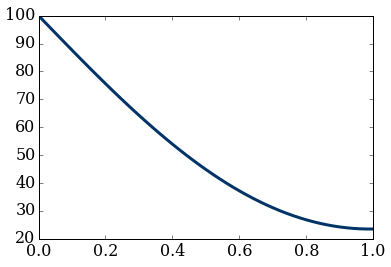

In [12]:
pyplot.plot(np.linspace(0,1,nx), T, color='#003366', ls='-', lw=3);

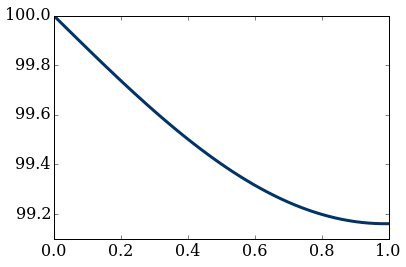

In [13]:
sigma = 5

A = generateMatrix(nx, sigma)

T = implicit_ftcs(Ti.copy(), A, nt, sigma)

pyplot.plot(np.linspace(0,1,nx), T, color='#003366', ls='-', lw=3);

(99.0, 100.0)

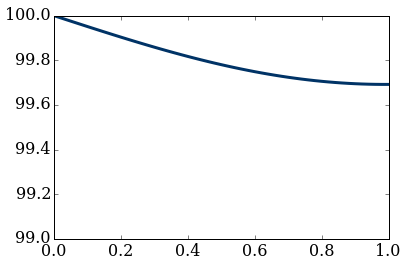

In [43]:
sigma = 6

A = generateMatrix(nx, sigma)

T = implicit_ftcs(Ti.copy(), A, nt, sigma)

pyplot.plot(np.linspace(0,1,nx), T, color='#003366', ls='-', lw=3);
pyplot.ylim(99.0,100.0)

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'C:\\Users\\croberts94\\Desktop\\GitHub\\MAE6286\\connor_style.css'
HTML(open(css_file, "r").read())